In [20]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from itertools import combinations
from sklearn.datasets import fetch_openml


In [16]:
TRAIN_PATH = 'iris_remaining_40.csv'
TEST_PATH = 'iris_sample_10.csv'

train = pd.read_csv("./Assignment-9/iris_remaining_40.csv")
test = pd.read_csv("./Assignment-9/iris_sample_10.csv")

# Detect columns automatically
possible_cols = {'sepal length': None, 'sepal width': None, 'petal length': None, 'petal width': None}
for c in train.columns:
    lc = c.lower()
    for key in list(possible_cols.keys()):
        if key in lc:
            possible_cols[key] = c

# Define feature sets
f1 = [possible_cols['sepal length']]
f2 = [possible_cols['sepal length'], possible_cols['sepal width']]
f3 = [possible_cols['sepal length'], possible_cols['sepal width'], possible_cols['petal length']]
f4 = [possible_cols['sepal length'], possible_cols['sepal width'], possible_cols['petal length'], possible_cols['petal width']]

scenarios = [
    ('(i) sepal length', f1),
    ('(ii) sepal length & sepal width', f2),
    ('(iii) sepal length, sepal width & petal length', f3),
    ('(iv) all features', f4)
]

In [17]:
def run_kmeans_and_plot(train_df, test_df, feature_cols, k=3, scenario_name='scenario'):
    X_train = train_df[feature_cols].values
    X_test = test_df[feature_cols].values

    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train)
    centers = kmeans.cluster_centers_
    train_labels = kmeans.labels_

    print(f"\n-- {scenario_name} --")
    print("Features:", feature_cols)
    display(pd.DataFrame(centers, columns=feature_cols))

    if len(feature_cols) == 1:
        x = X_train[:, 0]
        plt.figure(figsize=(8, 3))
        plt.scatter(x, np.zeros_like(x), c=train_labels, s=40)
        plt.scatter(centers[:, 0], np.zeros_like(centers[:, 0]), marker='D', s=120)
        plt.title(f"{scenario_name} — Training data (1D)")
        plt.xlabel(feature_cols[0])
        plt.yticks([])
        plt.show()

        # classify test
        dists = np.linalg.norm(X_test[:, None, :] - centers[None, :, :], axis=2)
        test_assign = np.argmin(dists, axis=1)
        plt.figure(figsize=(8, 3))
        plt.scatter(x, np.zeros_like(x), c=train_labels, s=40, alpha=0.4)
        plt.scatter(X_test[:, 0], np.zeros_like(X_test[:, 0]) + 0.05, c=test_assign, marker='x', s=80)
        plt.scatter(centers[:, 0], np.zeros_like(centers[:, 0]), marker='D', s=120)
        plt.title(f"{scenario_name} — Classified test points (1D)")
        plt.xlabel(feature_cols[0])
        plt.yticks([])
        plt.show()
        return centers, test_assign

    elif len(feature_cols) == 2:
        x, y = X_train[:, 0], X_train[:, 1]
        plt.figure(figsize=(6, 5))
        plt.scatter(x, y, c=train_labels, s=40)
        plt.scatter(centers[:, 0], centers[:, 1], marker='D', s=120)
        plt.title(f"{scenario_name} — Training data (2D)")
        plt.xlabel(feature_cols[0])
        plt.ylabel(feature_cols[1])
        plt.show()

        dists = np.linalg.norm(X_test[:, None, :] - centers[None, :, :], axis=2)
        test_assign = np.argmin(dists, axis=1)
        plt.figure(figsize=(6, 5))
        plt.scatter(x, y, c=train_labels, s=40, alpha=0.4)
        plt.scatter(X_test[:, 0], X_test[:, 1], c=test_assign, marker='x', s=100)
        plt.scatter(centers[:, 0], centers[:, 1], marker='D', s=120)
        plt.title(f"{scenario_name} — Classified test points (2D)")
        plt.xlabel(feature_cols[0])
        plt.ylabel(feature_cols[1])
        plt.show()
        return centers, test_assign

    else:
        pairs = list(combinations(range(len(feature_cols)), 2))
        for (i, j) in pairs:
            plt.figure(figsize=(6, 5))
            plt.scatter(X_train[:, i], X_train[:, j], c=train_labels, s=40, alpha=0.7)
            plt.scatter(centers[:, i], centers[:, j], marker='D', s=120)
            plt.xlabel(feature_cols[i])
            plt.ylabel(feature_cols[j])
            plt.title(f"{scenario_name} — Training: {feature_cols[i]} vs {feature_cols[j]}")
            plt.show()

        dists = np.linalg.norm(X_test[:, None, :] - centers[None, :, :], axis=2)
        test_assign = np.argmin(dists, axis=1)
        for (i, j) in pairs:
            plt.figure(figsize=(6, 5))
            plt.scatter(X_train[:, i], X_train[:, j], c=train_labels, s=30, alpha=0.4)
            plt.scatter(X_test[:, i], X_test[:, j], c=test_assign, marker='x', s=100)
            plt.scatter(centers[:, i], centers[:, j], marker='D', s=120)
            plt.xlabel(feature_cols[i])
            plt.ylabel(feature_cols[j])
            plt.title(f"{scenario_name} — Classified test points: {feature_cols[i]} vs {feature_cols[j]}")
            plt.show()
        return centers, test_assign



-- (i) sepal length --
Features: ['sepal length (cm)']


,sepal length (cm)
0,5.681818
1,7.278571
2,4.883333
3,6.432432


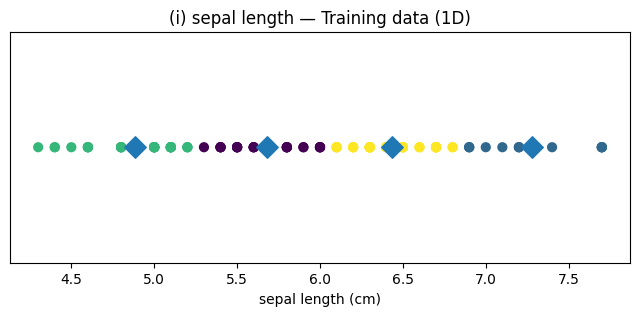

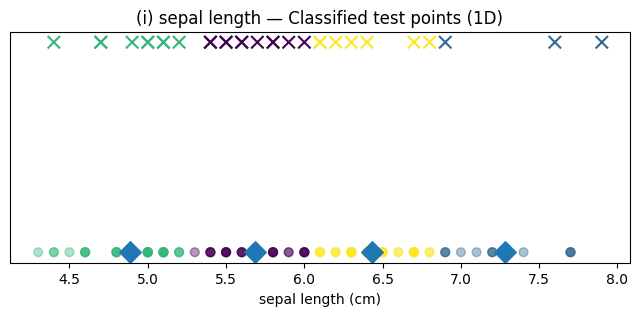


-- (ii) sepal length & sepal width --
Features: ['sepal length (cm)', 'sepal width (cm)']


,sepal length (cm),sepal width (cm)
0,6.802564,3.071795
1,5.200000,3.608000
2,4.775000,2.880000
3,5.900000,2.730556


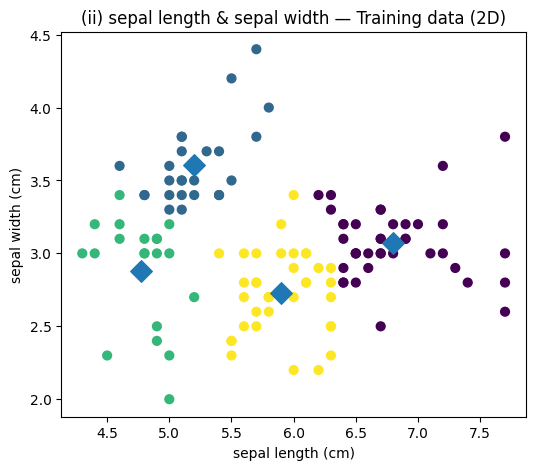

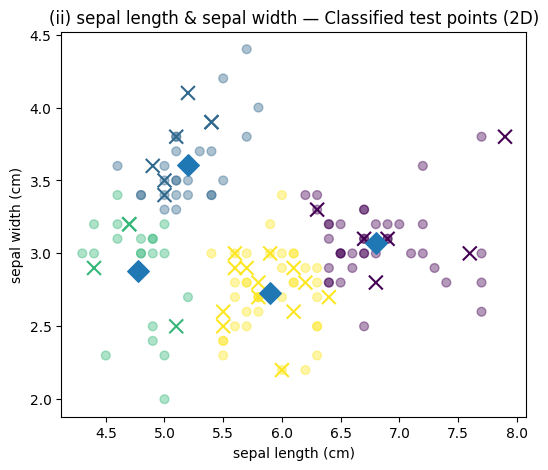


-- (iii) sepal length, sepal width & petal length --
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']


,sepal length (cm),sepal width (cm),petal length (cm)
0,5.012500,3.397500,1.462500
1,6.282353,2.894118,4.811765
2,5.519048,2.628571,3.980952
3,6.928000,3.056000,5.884000


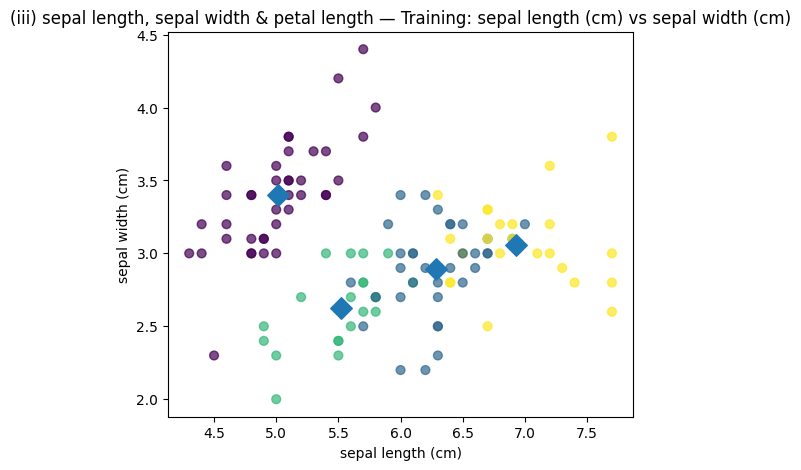

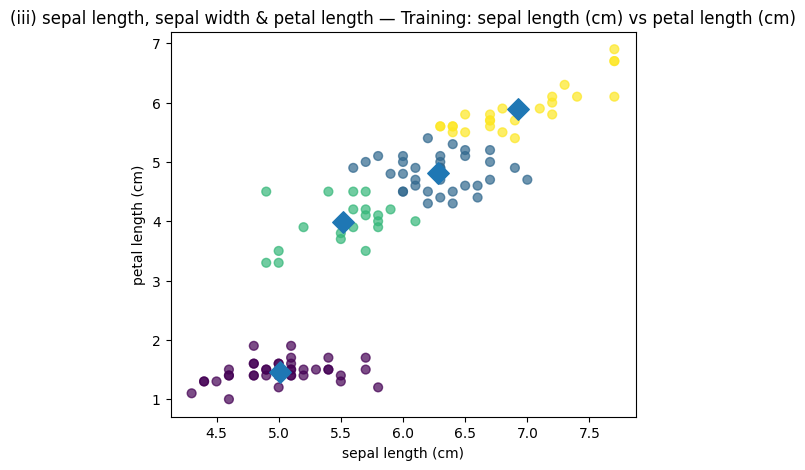

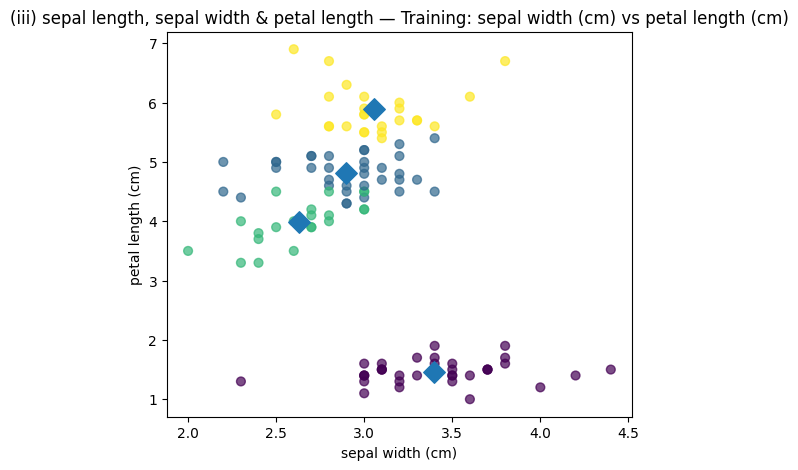

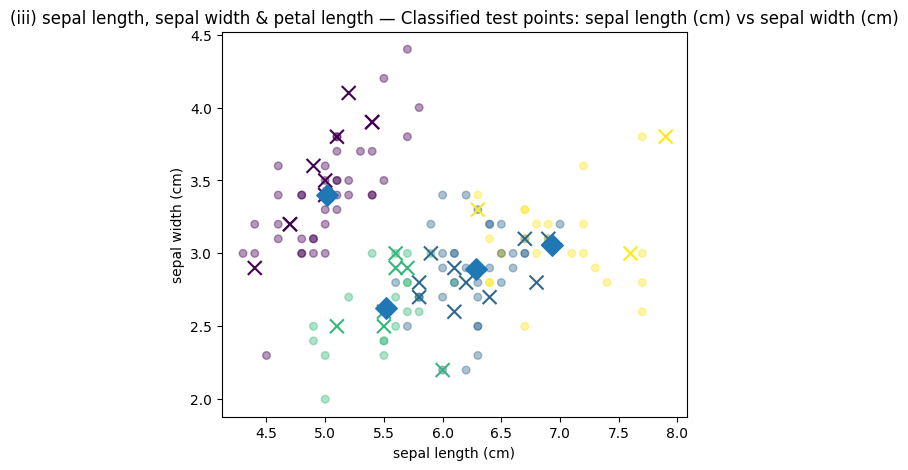

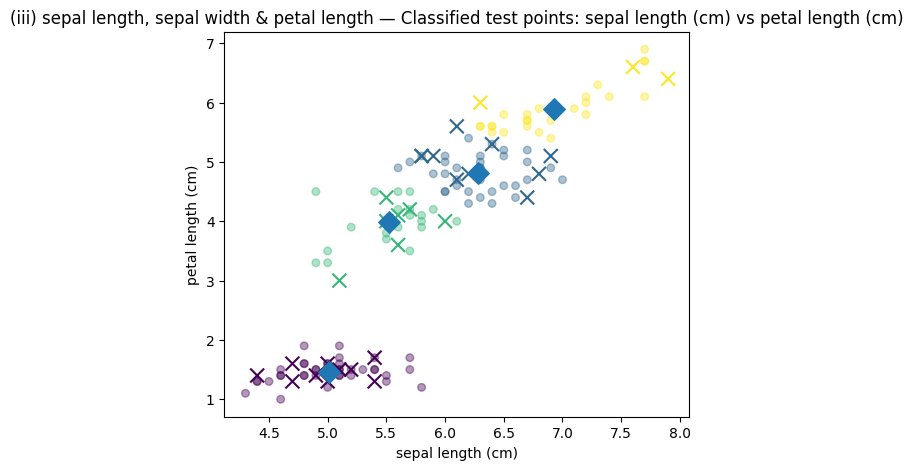

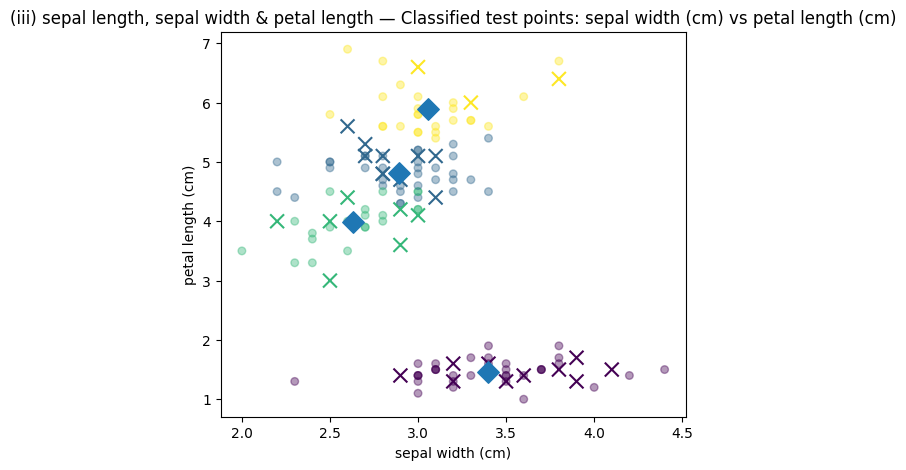


-- (iv) all features --
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,6.236364,2.872727,4.739394,1.593939
1,5.012500,3.397500,1.462500,0.242500
2,5.494737,2.589474,3.942105,1.205263
3,6.875000,3.071429,5.821429,2.117857


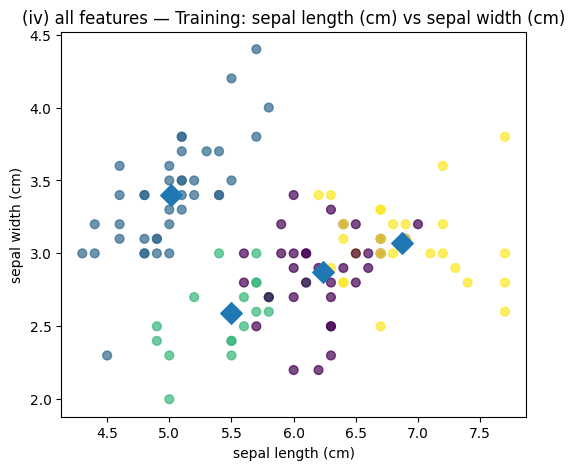

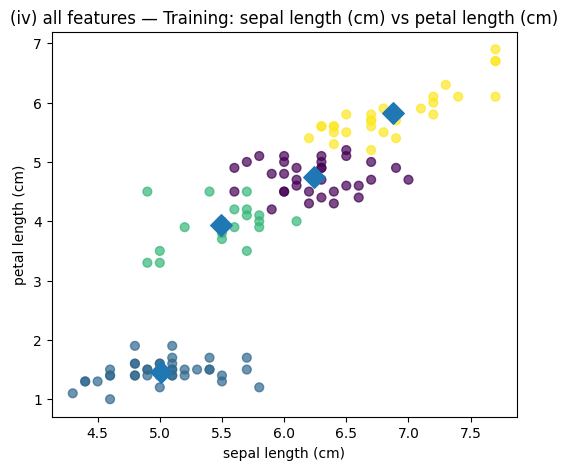

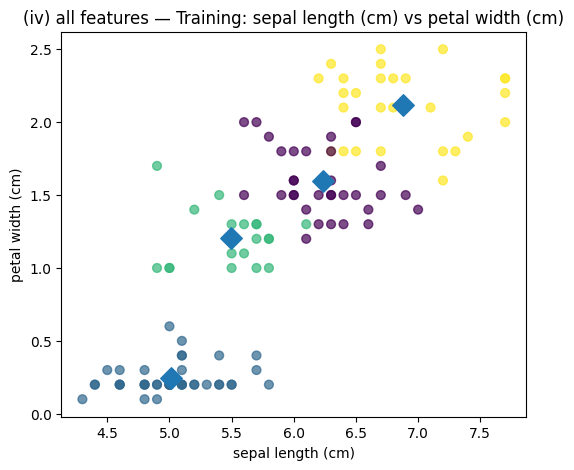

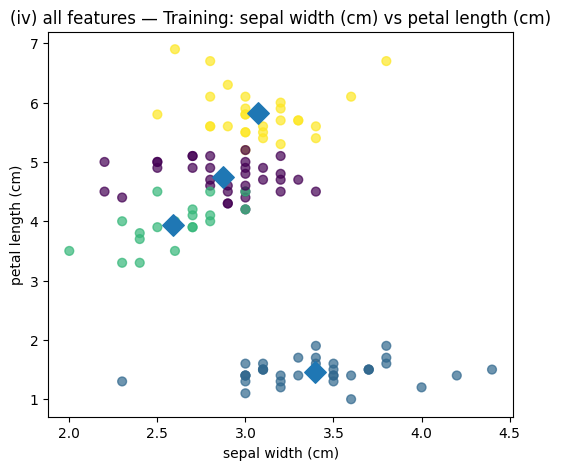

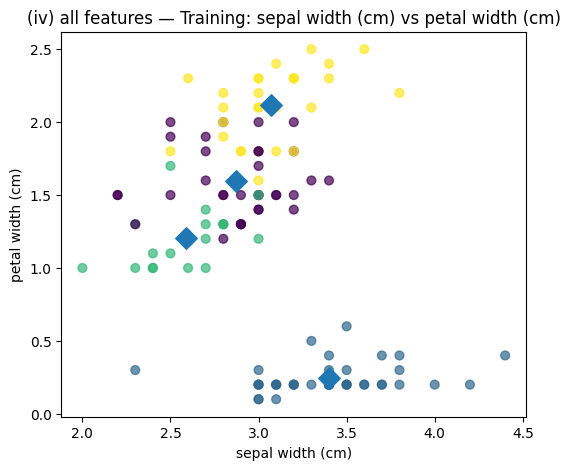

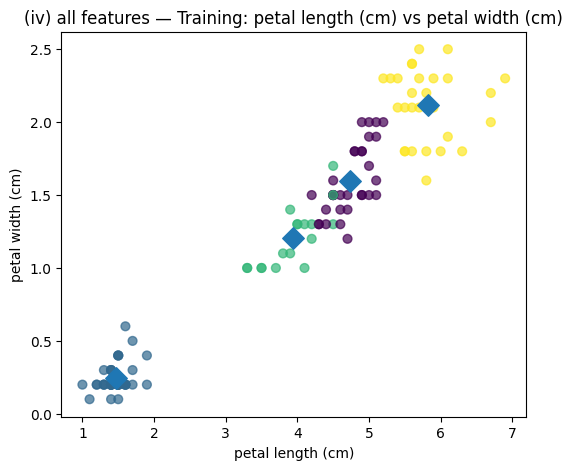

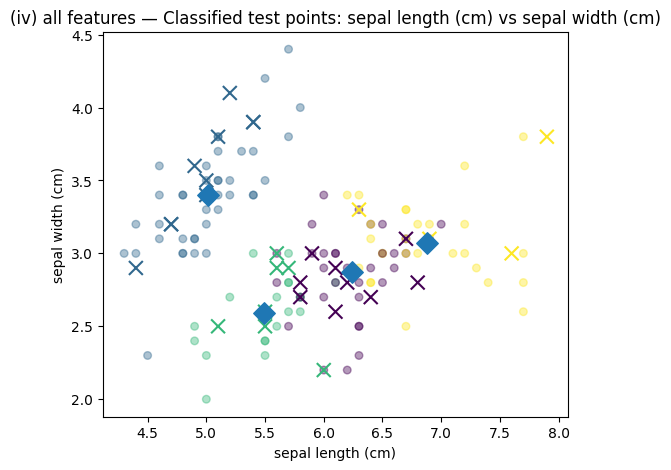

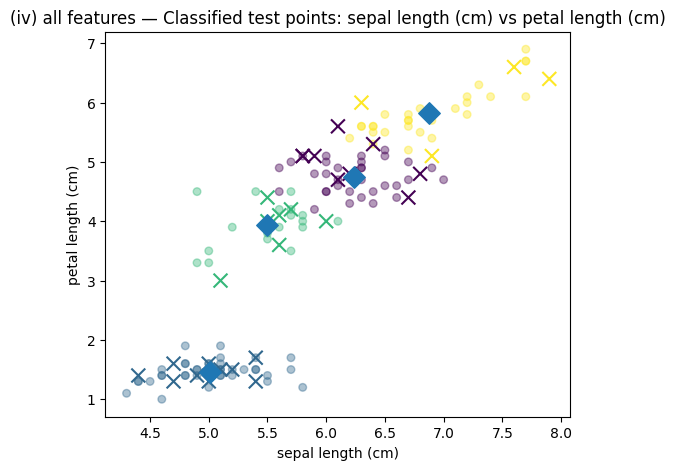

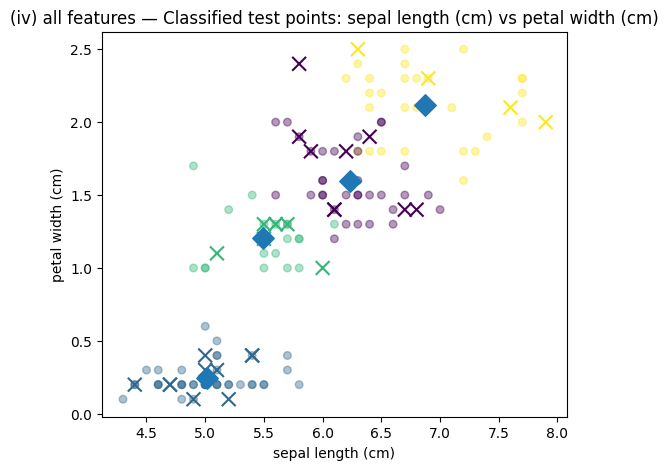

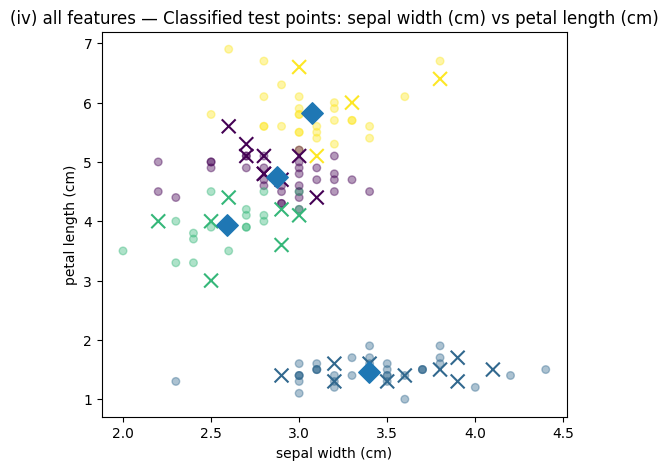

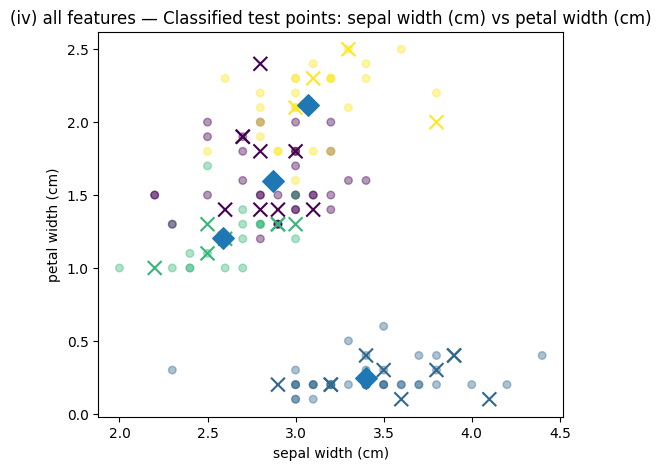

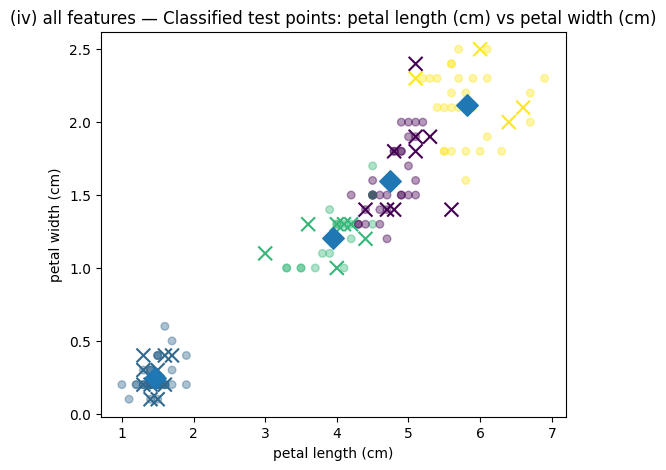


Scenario: (i) sepal length
Feature cols: ['sepal length (cm)']
Test assignment counts: [11  3  9  7]

Scenario: (ii) sepal length & sepal width
Feature cols: ['sepal length (cm)', 'sepal width (cm)']
Test assignment counts: [ 6  7  4 13]

Scenario: (iii) sepal length, sepal width & petal length
Feature cols: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']
Test assignment counts: [10 10  7  3]

Scenario: (iv) all features
Feature cols: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Test assignment counts: [ 9 10  7  4]


In [18]:
results = {}
for (name, features) in scenarios:
    if any(f is None for f in features):
        print(f"Skipping {name} because feature names couldn't be detected.")
        continue
    centers, test_assign = run_kmeans_and_plot(train, test, features, k=4, scenario_name=name)
    results[name] = {"features": features, "centers": centers, "test_assign": test_assign}

# Summary
for name, info in results.items():
    print("\nScenario:", name)
    print("Feature cols:", info["features"])
    print("Test assignment counts:", np.bincount(info["test_assign"]))

In [21]:
print("Fetching MNIST dataset...")
mnist = fetch_openml("mnist_784", version=1, as_frame=False)
X = mnist.data
print("Original data shape:", X.shape)

Fetching MNIST dataset...
Original data shape: (70000, 784)


In [22]:
X = X.reshape(X.shape[0], -1)
print("Flattened shape:", X.shape)

Flattened shape: (70000, 784)



Performing KMeans for k = 5 ...


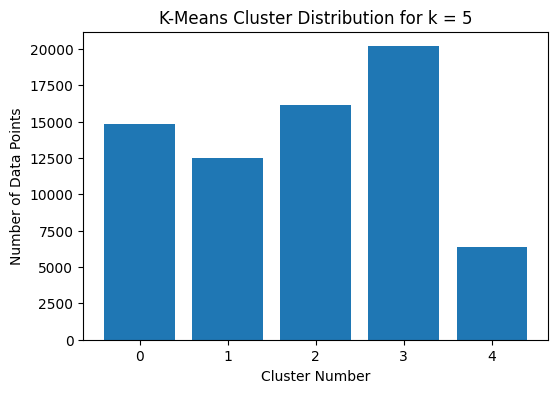


Performing KMeans for k = 6 ...


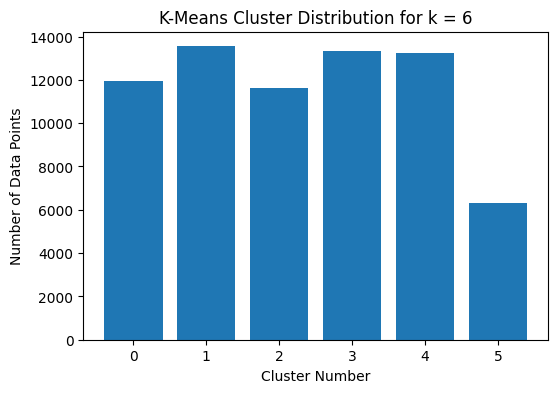


Performing KMeans for k = 7 ...


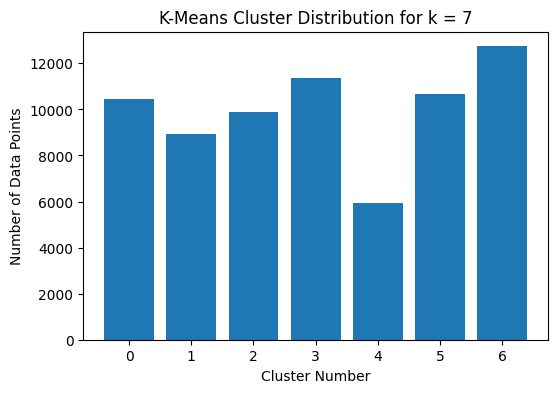


Performing KMeans for k = 8 ...


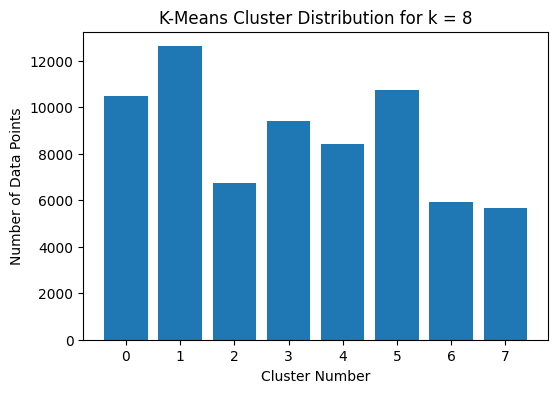


Performing KMeans for k = 9 ...


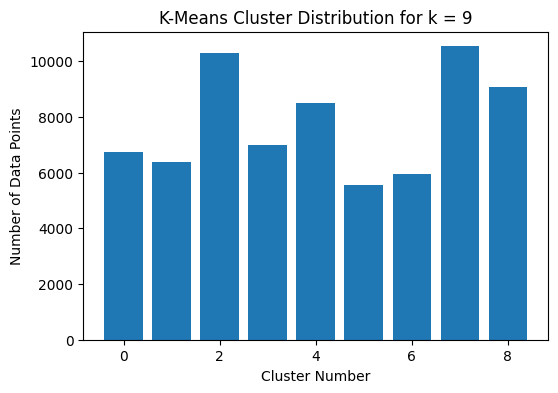


Performing KMeans for k = 10 ...


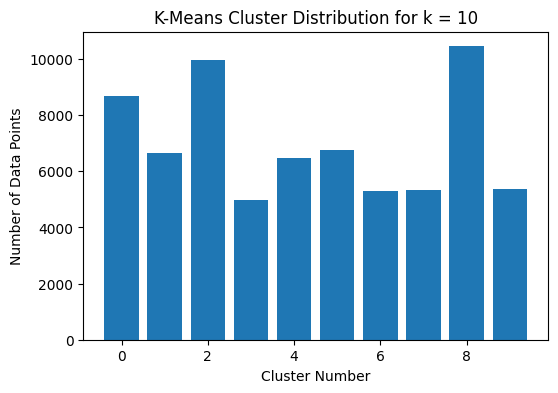

In [23]:
for k in range(5, 11):
    print(f"\nPerforming KMeans for k = {k} ...")
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)

    unique, counts = np.unique(labels, return_counts=True)

    plt.figure(figsize=(6, 4))
    plt.bar(unique, counts)
    plt.xlabel("Cluster Number")
    plt.ylabel("Number of Data Points")
    plt.title(f"K-Means Cluster Distribution for k = {k}")
    plt.show()